# Understanding SVD

https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline

## Rotate and scale single vector

In [11]:
x=np.array([1,0]) # Original vector
theta = 30 * mt.pi / 180 # 30 degress in radian

# Rotation matrix for theta=30 degrees
A = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
]) 

B = np.array([[3,0],[0,1]]) # Stretching matrix

Ax = A @ x  # y1 is the rotated vector
Bx = B @ x  # y2 is the stretched vector

In [34]:
# Reshaping and storing both x and Ax in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1,2), Ax.reshape(1,2)])
# Reshaping and storing both x and Bx in t2 to be plotted as vectors
t2 = np.concatenate([x.reshape(1,2), Bx.reshape(1,2)])

origin = [[0, 0], [0, 0]] # origin points

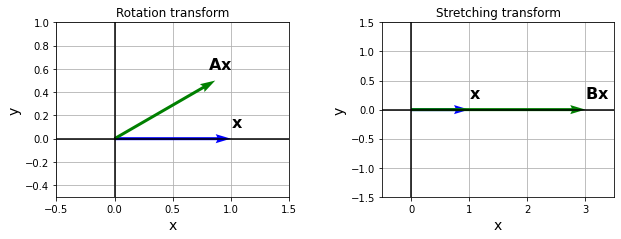

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting t1
ax1.quiver(*origin, t1[:,0], t1[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5,1.5])
ax1.set_ylim([-0.5,1])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Rotation transform")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.1, "$\mathbf{x}$", fontsize=16)
ax1.text(0.8, 0.6, "$\mathbf{Ax}$", fontsize=16)

# Plotting t2
ax2.quiver(*origin, t2[:,0], t2[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-0.5,3.5])
ax2.set_ylim([-1.5,1.5])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Stretching transform")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.2, "$\mathbf{x}$", fontsize=16)
ax2.text(3, 0.2, "$\mathbf{Bx}$", fontsize=16)

plt.show()

## Rotate and scale circle

In [103]:
# Creating the vectors for a circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

In [104]:
xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)

In [105]:
# x = np.vstack((xi1, yi1))
X = np.vstack((xi, yi))

In [106]:
X.shape

(2, 200)

In [107]:
# getting a sample vector from x
x_sample1 = X[:, 65]
x_sample2 = X[:, 100]

In [108]:
x_sample1, x_sample1.shape

(array([0.31313131, 0.94970984]), (2,))

In [109]:
A = np.array([[3, 2],
              [0, 2]]) 

t = A @ X  # Vectors in t are the transformed vectors of x

t_sample1 = t[:, 65]
t_sample2 = t[:, 100]

In [110]:
# plt.plot(x[0,:], x[1,:], color='b')

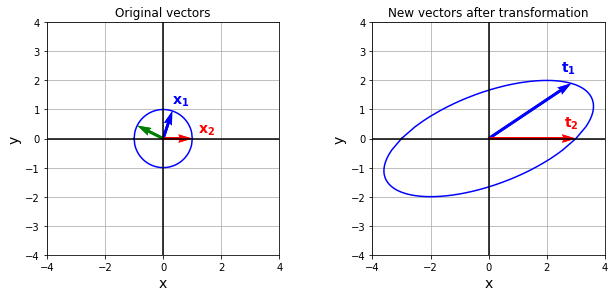

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(X[0,:], X[1,:], color='b')
ax1.quiver(*origin, x_sample1[0], x_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, x_sample2[0], x_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

x_sample3 = [-0.89442719, 0.4472136]
ax1.quiver(*origin, x_sample3[0], x_sample3[1], color=['g'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.3, 1.2, "$\mathbf{x_1}$", color='b', fontsize=14)
ax1.text(1.2, 0.2, "$\mathbf{x_2}$", color='r', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, t_sample1[0], t_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t_sample2[0], t_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(2.5, 2.3, "$\mathbf{t_1}$", color='b', fontsize=14)
ax2.text(2.6, 0.4, "$\mathbf{t_2}$", color='r', fontsize=14)
plt.savefig('2.png', dpi=300, bbox_inches='tight')

plt.show()

## Eigenvalues and eigenvectors

In [75]:
B = np.array([
    [-1, 1],
    [0, -2]
])
# lam, u = LA.eig(B)
lam, u = LA.eig(A)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [3. 2.]
u= [[ 1.     -0.8944]
 [ 0.      0.4472]]


In [76]:
i = 1
u[:,i], lam[i]

(array([-0.89442719,  0.4472136 ]), 2.0)

### Symmetric matrix
Scale matrix
<br>
A symmetric matrix transforms a vector by stretching or shrinking it along its eigenvectors.
<br>
<br>
Симметричная матрица влияет на вектор растягивая его или сужая вдоль направления своих собственных векторов.
Величина растяжения при этом пропорциональна соответствующим собственным значениям.

In [84]:
B = np.array([
    [3, 1],
    [1, 2]
])

lam, u = LA.eig(B)
print(np.round(lam, 4))
print(np.round(u, 4))

[3.618 1.382]
[[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


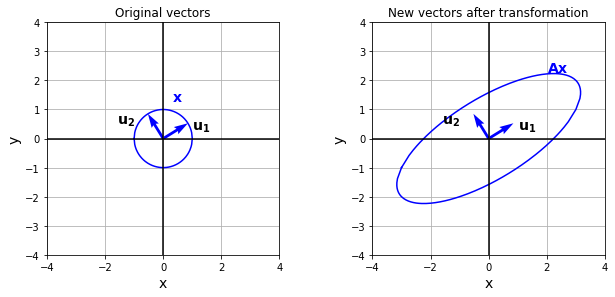

In [83]:
t = B @ x   # Vectors in t are the transformed vectors of x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.3, 1.3, "$\mathbf{x}$", color='b', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(2, 2.3, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

## Coordinates of vector in a new basis

In [88]:
# The Basis
v_1 = np.array([[1],[0]])
v_2 = np.array([[-1/mt.sqrt(2)],[1/mt.sqrt(2)]])

# Change of coordinate matrix
p =np.concatenate([v_1, v_2], axis=1)
p_inv = np.linalg.inv(p) 

# Coordinate of x in R^2
x=np.array([[2], [2]])

# New coordinate relative to basis B
x_B = p_inv @ x

np.round(x_B, 2)

array([[4.  ],
       [2.83]])

In [90]:
x_B.shape

(2, 1)

## Eigendecomposition

Рассмотрим симметричную матрицу А
<br>
Для любой симметричной матрицы ее собственные вектора являются попарно ортогональными и ленейно независимыми. Пусть Р матрица составленная и собственных векторов столбцов(нормированных), тогда верно равенство:
<br>
$P^{-1} = P^T$
<br>
Р матрица из орто-нормированных векторов

In [92]:
A = np.array([[3, 1],
              [1, 2]]) 

lam, u = LA.eig(A)

u1= u[:,0].reshape(2,1)
lam1 = lam[0]
# A_1 = lambda_1 * u1 * u1^T
A_1 = lam1 * (u1 @ u1.T)

u2= u[:,1].reshape(2,1)
lam2 = lam[1]
# A_2 = lambda_2 * u2 * u2^T
A_2 = lam2 * (u2 @ u2.T)

In [98]:
print(np.round(lam, 4))
print(np.round(u, 4))

[3.618 1.382]
[[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


$A_1$ and $A_2$ are called **projection matricies**, they are always **symmetric** because each of them is multiplication of $u_i u_i^T$

In [96]:
print(np.round(A_1, 4))

[[2.618 1.618]
 [1.618 1.   ]]


First eigenvalue of $A_1$ is the same as of original matrix $A$, the another ones are zero
<br>
Eigenvectors of a projection matrix are the same as of original matrix.

In [95]:
lam_A_1, u_A_1 = LA.eig(A_1)
print(np.round(lam_A_1, 4))
print(np.round(u_A_1, 4))

[ 3.618 -0.   ]
[[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


In [99]:
lam_A_2, u_A_2 = LA.eig(A_2)
print(np.round(lam_A_2, 4))
print(np.round(u_A_2, 4))

[0.    1.382]
[[-0.8507  0.5257]
 [-0.5257 -0.8507]]


In [117]:
t = A_1 @ X  # Vectors in t are the transformed vectors of x

# getting the transformed sample of x from t
t_sample = t[:, 100]

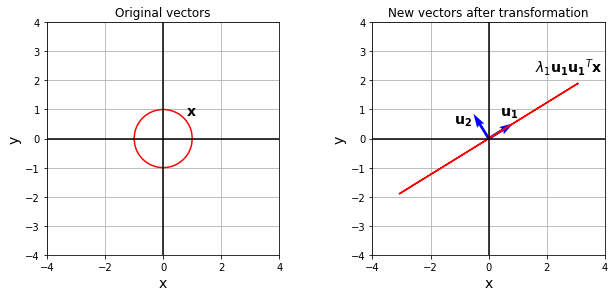

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting s
ax1.plot(X[0,:], X[1,:], color='r')
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.8, 0.8, "$\mathbf{x}$", fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='r')
ax2.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.4, 0.8, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(1.6, 2.3, "$\lambda_1\mathbf{u_1}\mathbf{u_1}^T\mathbf{x}$", fontsize=14)

plt.show()

Так собственные значения соответствующие всем другим собственным векторам матрицы $A_1$ равны нулю, все значения векторов в этом направлении также зануляются, в соответствии со свойсвом симметричной матрицы.
<br>
Ранг каждой *проекционной матрицы*, такой как $A_1$ равен 1

## SVD

In [122]:
A = np.array([[4, 1, 3],
              [8, 3, -2]])

In [125]:
print(A.T @ A)

[[80 28 -4]
 [28 10 -3]
 [-4 -3 13]]


In [124]:
lam, v = LA.eig(A.T @ A)
print(np.round(lam, 4))
print(np.round(v, 4))

[90.1167  0.     12.8833]
[[ 0.9415  0.3228  0.0969]
 [ 0.3314 -0.9391 -0.0906]
 [-0.0617 -0.1174  0.9912]]


In [127]:
V = v[:, lam.argsort()[::-1]]
print(np.round(V, 4))

[[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]


In [128]:
lam_sorted = np.sort(lam)[::-1]
lam_sorted = lam_sorted[lam_sorted > 1e-8]
sigma = np.sqrt(lam_sorted)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(sigma)

print(np.round(Sigma, 4))

[[9.493  0.     0.    ]
 [0.     3.5893 0.    ]]


In [129]:
r = len(sigma)
U = A @ V[:,:r] / sigma
print(np.round(U, 4))

[[ 0.4121  0.9111]
 [ 0.9111 -0.4121]]


### Numpy implementation

In [134]:
U, s, VT = LA.svd(A)
print("U=\n", np.round(U, 4))
print("s=\n", np.round(s, 4))
print("V=\n", np.round(VT.T, 4))

U=
 [[-0.4121 -0.9111]
 [-0.9111  0.4121]]
s=
 [9.493  3.5893]
V=
 [[-0.9415 -0.0969 -0.3228]
 [-0.3314  0.0906  0.9391]
 [ 0.0617 -0.9912  0.1174]]


In [136]:
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(s)
A_reconstructed = U @ Sigma @ VT
print("Reconstructed A=\n", A_reconstructed)

Reconstructed A=
 [[ 4.  1.  3.]
 [ 8.  3. -2.]]
